In [ ]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

# Getting Data

In [ ]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [ ]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
def load_housing_data(housing_path = HOUSING_PATH):
  csv_path = os.path.join(housing_path,"housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing = load_housing_data()

## Data summary

In [ ]:
housing.head()

In [ ]:
housing.info()

In [ ]:
housing.ocean_proximity.value_counts()

In [ ]:
housing.describe()

### Plotting

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Data Manipulation

### Add attribute: Income Category

Adding Income Category attribute (*income_cat*) to capture various categories of income. </br>
This will influence the house prices.

<AxesSubplot:>

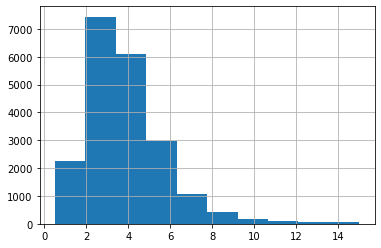

In [15]:
housing.median_income.hist()

In [18]:
import numpy as np

# limit the number of income categories by dividing by 1.5 (no science behind selecting 1.5, just select what feels right)
# round up using ceil, to have discrete categories
housing["income_cat"] = np.ceil(housing.median_income / 1.5)
# merge all categories greater than 5 to 5 itself (categories of 6 and above also exist if we see the histogram of median income)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [19]:
housing.income_cat.value_counts() 

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

<AxesSubplot:>

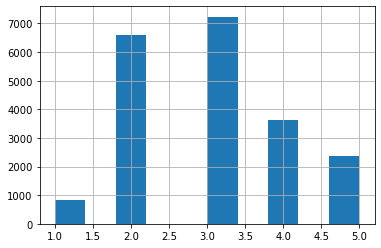

In [20]:
housing.income_cat.hist()

### Stratified Sampling

capturing samples that represent the data and avoiding skewness

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]